# Data Munging

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
raw_train_data = pd.read_csv("sales_train.csv")
category_data = pd.read_csv("items.csv").loc[:,["item_id", "item_category_id"]]
df = raw_train_data.join(category_data.set_index("item_id"), on = "item_id").drop("date", axis = 1)
category_data_dict = {x[0]:x[1] for x in category_data.itertuples(index = False)}
df = df.sample(frac=0.005, replace = True)

# One hot encoding

In [6]:
# not encoding item_id becasue possible unique set size is 22170
for column in ["shop_id", "item_category_id"]:
    df = pd.concat([df ,pd.get_dummies(df[column], prefix = column)], axis = 1)
    df.drop([column], axis = 1, inplace = True)
df.head()

KeyError: 'shop_id'

# Abalation//pending

In [4]:
print(len(set(category_data.item_category_id.unique())))
print(len(set(category_data.item_id.unique())))
print(len(set(raw_train_data.shop_id.unique())))

84
22170
60


In [5]:
# def getSubSampleTrainTestSet(data_set,):
sample_item_set = set(sample_train.item_id)
len(sample_item_set)
def isInTraining(item_id):
    if item_id in sample_item_set:
        return True
    return False
def getCategoryIdForItem(item_id):
#     return category_data.loc[category_data["item_id"] == item_id , "item_id"]
    return category_data_dict[item_id]



NameError: name 'sample_train' is not defined

In [60]:
% matplotlib inline

In [ ]:
_df = df[["shop_id", "item_cnt_day", "item_price","item_category_id", "item_id"]].loc[(df["item_price"]<1000) 
& (df["item_cnt_day"] < 5) & (df["item_price"] > 0) & (df["item_cnt_day"] > 0)]
# _df = df[['item_price','item_cnt_day','date_block_num','shop_id']].loc[(df['item_price']>0) & (df['item_price']<100000) & (df['item_cnt_day']<50)]

In [ ]:
plt.scatter(_df["shop_id"], _df["item_cnt_day"], s=0.1)

In [ ]:
pd.unique(_df["shop_id"])

In [ ]:
plt.scatter(_df["item_category_id"], _df["item_cnt_day"], s=0.1)

In [ ]:
plt.scatter(_df["item_price"], _df["item_cnt_day"], s=0.1)

In [ ]:
plt.scatter(_df["item_id"], _df["shop_id"], s=0.1)

In [ ]:
plt.scatter(_df["item_id"], _df["item_category_id"], s=0.1)

In [ ]:
plt.scatter(_df["shop_id"], _df["item_category_id"], s=0.1)

In [ ]:
_df.corr()

In [ ]:
plt.scatter(_df["item_price"], _df["item_category_id"], s=0.1)

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# figure = plt.figure()
# ax = figure.add_subplot(111, projection="3d")
# ax.scatter(_df["item_price"], _df["item_category_id"], _df["item_id"])
len(pd.unique(df["item_price"].astype(int)))

In [ ]:
len(pd.unique(df["item_category_id"]))

# Model Fitting

In [45]:
raw_train_data = pd.read_csv("sales_train.csv")
category_data = pd.read_csv("items.csv").loc[:,["item_id", "item_category_id"]]
df = raw_train_data.join(category_data.set_index("item_id"), on = "item_id").drop("date", axis = 1)
category_data_dict = {x[0]:x[1] for x in category_data.itertuples(index = False)}
# df = df.sample(frac=0.5, replace = True)

for column in ["shop_id", "item_category_id"]:
    df = pd.concat([df ,pd.get_dummies(df[column], prefix = column)], axis = 1)
    df.drop([column], axis = 1, inplace = True)
df.drop(["item_id"], axis = 1, inplace = True)

In [46]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [47]:
# lm = linear_model.LinearRegression()
clf = RandomForestClassifier()
df_train_Y = df_train.filter(regex="item_cnt_day")
df_train_X = df_train.drop("item_cnt_day", axis=1, inplace = False)
df_test_Y = df_train.filter(regex="item_cnt_day")
df_test_X = df_train.drop("item_cnt_day", axis=1, inplace = False)

In [48]:
# lm.fit(df_train_X,df_train_Y)
clf.fit(df_train_X, df_train_Y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
# df_test_pred = lm.predict(df_test_X)
df_test_pred = clf.predict(df_test_X)

In [50]:
mean_absolute_error(df_test_Y.values, df_test_pred)

0.17951580441601428

In [51]:
mean_squared_error(df_test_Y.values, df_test_pred)

1.9864327990329884

In [54]:
y1_lr=[0.399834638,
0.402822358,
0.412699131,
0.38614226,
0.378504211,
0.395057717,
0.392557673]
y2_lr=[1.631286356,
2.784851408,
3.885549068,
3.119806024,
2.692876491,
5.54590429,
6.361979668]
x_lr=[0.001,
0.005,
0.01,
0.05,
0.1,
0.5,
1]

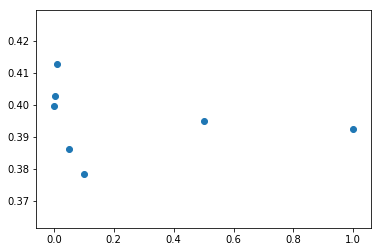

In [63]:
plt.scatter(x_lr,y1_lr)

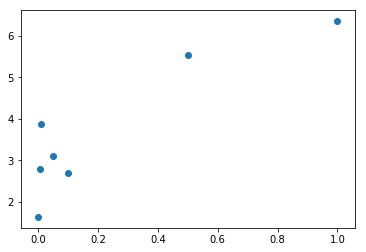

In [64]:
plt.scatter(x_lr,y2_lr)

In [52]:
y1_clf = [0.021294719,
0.05194584,
0.06523035,
0.105541032,
0.123435291,
0.16192854,
0.179515804]
y2_clf = [0.045144804,
0.250021289,
0.298475688,
0.719320804,
1.536262922,
2.862656354,
1.986432799]


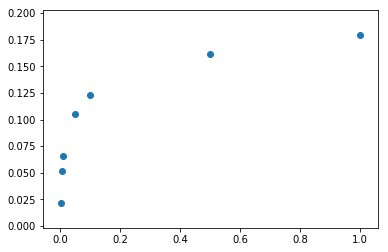

In [55]:
plt.scatter(x_lr, y1_clf)

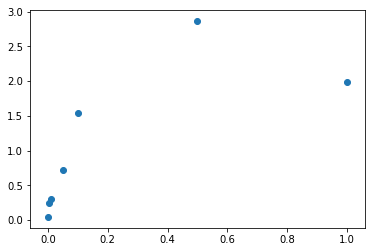

In [56]:
plt.scatter(x_lr, y2_clf)